  **NLP- LinkedIn course**
   
   - **Armin Norouzi**
   - Part of [NLP with Python for Machine Learning Essential Training](https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training?trk=course_title&upsellOrderOrigin=default_guest_learning)
   - Compatible with Google Colaboratory- TF version 2.8.0

   
**Objective:** 
- Definition of an NLP
- Tokenizing
- Vectorizing
- Recognize the outcomes of lemmatizing
- TF-IDF
- Accuracy in terms of evaluation metrics
- Ensemble methods
  


# NLP Basics & Importing Data


**NLP main pipeline:**

1. **Raw text:** model can't distinguish words
2. **Tokonize:** tell the model what to look at
3. **clean text:** remove stop words/punctuation, stemming, etc
4. **Vectorize:** convert to numeric form
5. **Feature Engineering**
6. **Machine Learning algorithm:** fit/train model

## Importing Text data

Importing NLKT library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords') #we need to download each package in order to use it

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')[0:500:10]

['i',
 "you've",
 'himself',
 'they',
 'that',
 'been',
 'a',
 'while',
 'through',
 'in',
 'here',
 'few',
 'own',
 'just',
 're',
 'doesn',
 'ma',
 "shouldn't"]

### Importing unstructure data

#### Using a difficult way to import dataset

In [ ]:
import urllib
response = urllib.request.urlopen("https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv")
rawData = response.read()
rawData=rawData.decode("utf-8") 

In [ ]:
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

parsed the data: replace '\t' with '\n' and then split it based on '\n'

Output will be a list where odd numbers are labels and rest are text

In [ ]:
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam']

Devid labels and body text

In [ ]:
labelList = parsedData[0::2]
textList = parsedData[1::2]

In [ ]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [ ]:
print(len(textList))
print(len(labelList))

5574
5575


In [ ]:
labelList[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [ ]:
textList[-5:]

['This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.',
 'Will ü b going to esplanade fr home?',
 'Pity, * was in mood for that. So...any other suggestions?',
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
 'Rofl. Its true to its name']

In [ ]:
# remove the last label as it is extra
labelList = labelList[:-1]

In [ ]:
print(len(textList))
print(len(labelList))

5574
5574


**Create a pandas dataframe based on parsed data**

In [ ]:
import pandas as pd

fullCorpus = pd. DataFrame({
    'label' : labelList,
    'body_list' : textList
})

fullCorpus.head()

,label,body_list
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Using Pandas to read data 

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv', sep = '\t', header = None) 
# without header = None, it will add first row as header
dataset.columns = ['label', 'body_text']

In [ ]:
dataset.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Explore dataset

In [ ]:
# Shape of the inputs

print('Input data has {} rows and {} columns'.format(len(dataset), len(dataset.columns)))

Input data has 5572 rows and 2 columns


In [ ]:
# How many spam/ham are there?

print('Out of {} rows, {} are spam, {} are ham'.format(len(dataset), 
                                                        len(dataset[dataset['label'] == 'spam']),
                                                        len(dataset[dataset['label'] == 'ham'])))

Out of 5572 rows, 747 are spam, 4825 are ham


In [ ]:
# How many missing data is there?

print('Number of null in label: {}'.format(dataset['label'].isnull().sum()))
print('Number of null in body_text: {}'.format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in body_text: 0


### Regular Expressions
A regular expression (shortened as regex or regexp; also referred to as rational expression) is a sequence of characters that specifies a search pattern in text. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory.

Use cases:

- Confiming passwords meet criteria
- Searching URL for sone subsring
- Searching for files on your computer
- Documen scraping

In [ ]:
import re # Regular expression operations

In [ ]:
re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2\"\"\"\"\"\"different~regex-methods'

splitting a sentence into a list of words

In [ ]:
re.split('\s', re_test) # \s means looking for one single space to split

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s', re_test_messy) 

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

Because of extra white space, we have empty element in the list

In [ ]:
re.split('\s+', re_test_messy) # \s+ means looking for one or more space to split

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s+', re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

This method cannot split where the string has devided by special character!

In [ ]:
re.split('\W+', re_test_messy) # \W+ means looking for non-word, e.g., space, slash, ", ..., character to split

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
  re.findall('\S+', re_test_messy) # \S+ look for one or more non white space character

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
  re.findall('\w+', re_test_messy1) # \w+ look for one or more word character- looking for tokens

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

- regexes very useful for tokenizing

'\w' and '\W' --> search for words

'\s' and '\S' --> search for whitespaces

W us better for us to use as it returns seperated words

#### replacement using regexes

In [ ]:
# goal is finding PEP8 or similar word and replace it with PEP8
pep_test1 = 'I try to follow PEP8 guidlines'
pep_test2 = 'I try to follow PEEP8 guidlines'
pep_test3 = 'I try to follow PEP7 guidlines'

In [ ]:
re.findall('[a-z]+', pep_test1) # only lowercase a to z

['try', 'to', 'follow', 'guidlines']

In [ ]:
re.findall('[A-Z]+', pep_test1) # only uppecase A to Z but without number

['I', 'PEP']

In [ ]:
re.findall('[A-Z]+[0-9]+', pep_test1) # uppecase A to Z with number

['PEP8']

In [ ]:
# now we are using to replace miss spelled PEP8 from other sentences
print(pep_test2)
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Syleguid', pep_test2) # uppecase A to Z with number

I try to follow PEEP8 guidlines


'I try to follow PEP8 Python Syleguid guidlines'

In [ ]:
print(pep_test3)
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Syleguid', pep_test3) # uppecase A to Z with number

I try to follow PEP7 guidlines


'I try to follow PEP8 Python Syleguid guidlines'

# Preprocessing Text Data
Cleaning up the text data is neccessary to highlight attributes that you're goining to want your ML system to pick up on. Cleaning the data typically consist of a number of steps:

1. Removing punctuation 
2. Tokenization
3. Remove Stopwords
4. Lemmatize/Stem (advance)



In [ ]:
pd.set_option('display.max_colwidth',100) # to show more width in pandas dataframe

dataset.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## Removing punctuation

In [ ]:
import string # list of punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# write a function to remove puncuations

def remove_punct(text):
  text_nopunc = ''.join([char for char in text if char not in string.punctuation]) # without joint it only returns individual character - "" join on nothing
  return text_nopunc

dataset['body_text_cleaned'] = dataset['body_text'].apply(lambda x: remove_punct(x))
dataset.head()

,label,body_text,body_text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


## Tokenization

In [ ]:
import re

def tokonize(text):
  tokens = re.split('\W+', text)
  return tokens

dataset['body_text_cleaned_tokonized'] = dataset['body_text_cleaned'].apply(lambda x: tokonize(x.lower())) # to make all text lowercase
dataset.head()

,label,body_text,body_text_cleaned,body_text_cleaned_tokonized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


## Remove Stopwords

In [ ]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords') #we need to download each package in order to use it

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
stopwords_eng = stopwords.words('english')

In [ ]:
def remove_stopwords(tokonized_text):
  text = [word for word in tokonized_text if word not in stopwords_eng]
  return text
  
dataset['body_text_cleaned_tokonized_nonstop'] = dataset['body_text_cleaned_tokonized'].apply(lambda x: remove_stopwords(x)) # to make all text lowercase
dataset.head()

,label,body_text,body_text_cleaned,body_text_cleaned_tokonized,body_text_cleaned_tokonized_nonstop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


## Lemmatize/stem

### Stemming

- Process of reducing inflected (or sometimes derived) words to their word step or root

- Crudly chopping off the end of the word to leave only the base

e.g.: Stemming/stemmed ---> stem


*Stemmers:*
1. **Porter Stemmer:** Porter Stemmer or Porter algorithm was developed by Martin Porter in 1980. The algorithm employs five phases of word reduction, each with its own set of mapping rules. Porter Stemmer is the oldest stemmer is known for its simplicity and speed. The resulting stem is often a shorter word having the same root meaning.
2. **Snowball Stemmer:** The algorithm used here is more accurate and is known as “English Stemmer” or “Porter2 Stemmer”. It offers a slight improvement over the original Porter Stemmer, both in logic and speed.
3. **Lancaster Stemmer:** Lancaster Stemmer is simple but it tends to produce results with over stemming. Over-stemming causes the stems to be not linguistic, or they may have no meaning.
4. **Regex-Based Stemmer:** Regex stemmer uses regular expressions to identify morphological affixes. Any substrings that match the regular expressions will be removed.



In [ ]:
ps = nltk.PorterStemmer()

In [ ]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [ ]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [ ]:
print(ps.stem('run'))
print(ps.stem('run'))
print(ps.stem('runner'))

run
run
runner


- Put toghther all the functions we had before


In [ ]:
# write a function to remove puncuations

def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords_eng]
  return text



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv', sep = '\t', header = None) 
# without header = None, it will add first row as header
data.columns = ['label', 'body_text']


data['body_text_cleaned'] = data['body_text'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,body_text,body_text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [ ]:
def stemming(tokonized_text):
  text = [ps.stem(word) for word in tokonized_text]
  return text


data['body_text_stemmed'] = data['body_text_cleaned'].apply(lambda x: stemming(x))
data.head()

,label,body_text,body_text_cleaned,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


Stemming helps to reduce the corpus of words that models are exposed to and explicitly correlates words with similar meaning. 

### lemmatization

Lemmatization (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word, so they can be analyzed as a single item, identified by the word's lemma, or dictionary form



Stemming vs lemmatizing

Stemming is typically faster as it simply chops off the end of the word using heuristics without understanding the context in which a word is used.

Lemmatizing is typically more accurate as it uses more informed analysis to create a group of words with similar meanings based on the context around the word.

In [ ]:
# WordNet lemmatizer

wn = nltk.WordNetLemmatizer()

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [ ]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [ ]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


lemmatizing can distinguish meanness and meaning while stemming chopped them to mean!

In [ ]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [ ]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


Let's try to our dataset

In [ ]:
def lemmatizing(tokonized_text):
  text = [wn.lemmatize(word) for word in tokonized_text]
  return text


data['body_text_lemmatized'] = data['body_text_cleaned'].apply(lambda x: lemmatizing(x))
data.head()

,label,body_text,body_text_cleaned,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


# Vectorizing Raw Data

- Raw data needs to be converted to numbers so that Python and the algorithms used for ML can understand

- A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. This matrix is a specific instance of a document-feature matrix where "features" may refer to other properties of a document besides terms. It is also common to encounter the transpose, or term-document matrix where documents are the columns and terms are the rows.

Methods:

1. **Count vectorization:** Count Vectorization involves counting the number of occurrences each words appears in a document
2. **N-Grams:** n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles.
3. **Term frequency-inverse document frequency (TF-IDF):** is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today.

## Count Vectorization

In [ ]:
def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords_eng]
  return text

data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv', sep = '\t', header = None) 

data.columns = ['label', 'body_text']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer = clean_text)
x_counts = count_vec.fit_transform(data['body_text'])
print(x_counts.shape)
print(count_vec.get_feature_names())

(5572, 8340)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- Apply CounVectorizer to smaller smaole


In [ ]:
data_sample = data[0:20]

In [ ]:
count_vec_sample = CountVectorizer(analyzer = clean_text)
x_counts_sample = count_vec_sample.fit_transform(data_sample['body_text'])
print(x_counts_sample.shape)
print(count_vec_sample.get_feature_names())

(20, 239)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'Co', 'Eh', 'FA', 'Go', 'HL', 'He', 'I', 'Id', 'Im', 'No', 'ON', 'Oh', 'Ok', 'R', 'TC', 'Tb', 'To', 'U', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'b', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'from', 'fulfil', 'fun', 'goalsteam', 'goe', 'gonna', 'got', 'gota', 'grant', 'great', 'had', 'have', 'help', 'hey', 'home', 'hor', 'hour', 'httpwap', 'info', 'ive', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_counts_sample_df = pd.DataFrame(x_counts_sample.toarray())
x_counts_sample_df.head()

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_counts_sample_df.columns = count_vec_sample.get_feature_names()
x_counts_sample_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-gram

In [ ]:
# as n-grams want whole string instead of tokonized one we need to modify our cleas function 

def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+', text)
  text = ' '.join([ps.stem(word) for word in tokens if word not in stopwords_eng]) # as joining token together we need to add an space ' '
  return text

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv', sep = '\t', header = None) 
data.columns = ['label', 'body_text']


data['body_text_cleaned'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,body_text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,U dun say earli hor U c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah I dont think goe usf live around though


The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vec = CountVectorizer(ngram_range=(1,2)) # 2 means using bigram
x_counts = ngram_vec.fit_transform(data['body_text_cleaned'])

print(x_counts.shape)
print(ngram_vec.get_feature_names())

(5572, 42316)
['008704050406', '008704050406 sp', '0089mi', '0089mi last', '0121', '0121 2025050', '01223585236', '01223585236 xx', '01223585334', '01223585334 cum', '0125698789', '0125698789 ring', '02', '02 user', '020603', '020603 2nd', '020603 thi', '0207', '0207 153', '02070836089', '02072069400', '02072069400 bx', '02073162414', '02073162414 cost', '02085076972', '02085076972 repli', '020903', '020903 thi', '021', '021 3680', '021 3680offer', '050703', '050703 tcsbcm4235wc1n3xx', '0578', '06', '06 good', '060505', '061104', '07008009200', '07046744435', '07046744435 arrang', '07090201529', '07090298926', '07090298926 reschedul', '07099833605', '07099833605 reschedul', '071104', '07123456789', '07123456789 87077', '0721072', '0721072 find', '07732584351', '07732584351 rodger', '07734396839', '07734396839 ibh', '07742676969', '07742676969 show', '07753741225', '07753741225 show', '0776xxxxxxx', '0776xxxxxxx uve', '07786200117', '077xxx', '077xxx won', '078', '07801543489', '0780154

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-smaller sample

In [ ]:
data_sample = data[0:20]

In [ ]:
ngram_vec_sample = CountVectorizer(ngram_range=(2,2)) # 2 means using bigram
x_counts_sample = ngram_vec_sample.fit_transform(data_sample['body_text_cleaned'])

print(x_counts_sample.shape)
print(ngram_vec_sample.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(20, 242)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150 rcv', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aid patent', 'alreadi say', 'amor wat', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'around though', 'as per', 'as valu', 'avail bugi', 'back id', 'bless time', 'breather promis', 'brother like', 'buffet cine', 'bugi great', 'call 09061701461', 'call the', 'caller press', 'callertun caller', 'camera free', 'cash from', 'chanc win', 'chg send', 'cine got', 'claim call', 'claim code', 'claim no', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'crazi avail', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'darl week', 'date on', 'dont miss', 'dont think', 'dont want', 'dun say', 'earli hor', 'eg en

In [ ]:
x_counts_sample_df = pd.DataFrame(x_counts_sample.toarray())
x_counts_sample_df.head()

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_counts_sample_df.columns = ngram_vec_sample.get_feature_names()
x_counts_sample_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,20000 pound,2005 text,...,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub to,ye he,you week,you wonder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

$ w_{i,j} = \text{tf}_{i,j} \log \frac{N}{df_i} $

- $ \text{tf}_{i,j} $: numberf of times $i$ occures in $j$ devided by total number of term in $j$
- $ N $: number of documents containing $i$
- $ df_i $: total number of documents


$\text{tf}_{i,j} = \frac{\text{number of occurences of a word}}{\text{number of words in text message}}$

example:

I like NLP:

$\text{tf}_{i,j} = \frac{\text{number of occurences of a NLP}}{\text{number of words in text message}} = \frac{1}{3} = 0.33$

- assume that we have 20 text massage and only we have one with NLP

$ w_{i,j} = 0.33 \log \frac{20}{1} = 0.43 $

In [ ]:
def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords_eng]
  return text

data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv', sep = '\t', header = None) 

data.columns = ['label', 'body_text']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(analyzer=clean_text)
x_counts = tfidf_vec.fit_transform(data['body_text'])

print(x_counts.shape)
print(tfidf_vec.get_feature_names())

(5572, 8340)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-smaller sample

In [ ]:
data_sample = data[0:20]

In [ ]:
tfidf_vec_sample = TfidfVectorizer(analyzer=clean_text) # 2 means using bigram
x_counts_sample = tfidf_vec_sample.fit_transform(data_sample['body_text'])

print(x_counts_sample.shape)
print(tfidf_vec_sample.get_feature_names())

(20, 239)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'Co', 'Eh', 'FA', 'Go', 'HL', 'He', 'I', 'Id', 'Im', 'No', 'ON', 'Oh', 'Ok', 'R', 'TC', 'Tb', 'To', 'U', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'b', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'from', 'fulfil', 'fun', 'goalsteam', 'goe', 'gonna', 'got', 'gota', 'grant', 'great', 'had', 'have', 'help', 'hey', 'home', 'hor', 'hour', 'httpwap', 'info', 'ive', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_counts_sample_df = pd.DataFrame(x_counts_sample.toarray())
x_counts_sample_df.head()

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.198423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_counts_sample_df.columns = tfidf_vec_sample.get_feature_names()
x_counts_sample_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.198423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

Process of creating new features or transoforming existing features to get the most out of your data

1. Power transformation (square, square root, etc)
2. Standardizing data
3. Data transform

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/NLP-LinkedInCourse/main/data/SMSSpamCollection.tsv', sep = '\t', header = None) 
data.columns = ['label', 'body_text']

## Create feature

one class massage might be bigger than other so adding lenght of text massage might be helpful

In [ ]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


create feature for % of text that is punctuation

In [ ]:
import string 

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation]) 
  return round(count/(len(text) - text.count(" ")),3)*100 # percentage of ounctuation in text

data['body_punc_len%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,body_punc_len%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


## Ecaluation of created features

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

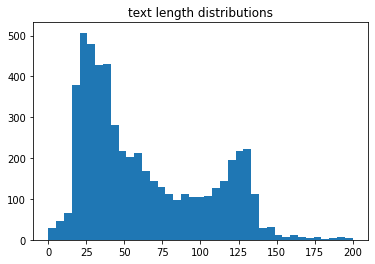

In [ ]:
bins = np.linspace(0,200,40)

plt.hist(data['body_len'], bins )
plt.title('text length distributions')
plt.show()

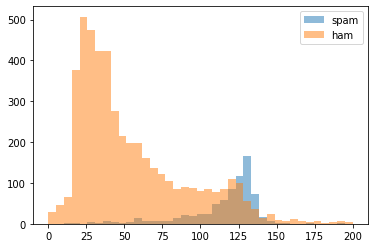

In [ ]:
bins = np.linspace(0,200,40)

plt.hist(data[data['label'] == 'spam'] ['body_len'], bins, alpha = 0.5,  label='spam')
plt.hist(data[data['label'] == 'ham'] ['body_len'], bins, alpha = 0.5,  label='ham')
plt.legend()
plt.show()

spam massages have more length

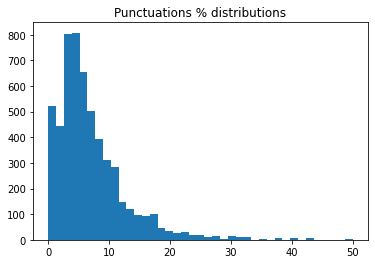

In [ ]:
bins = np.linspace(0,50,40)

plt.hist(data['body_punc_len%'], bins )
plt.title('Punctuations % distributions')
plt.show()

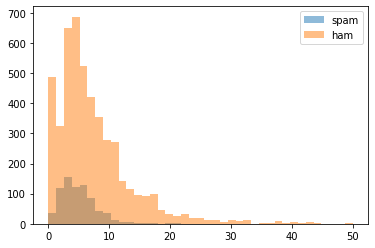

In [ ]:
bins = np.linspace(0,50,40)

plt.hist(data[data['label'] == 'spam'] ['body_punc_len%'], bins, alpha = 0.5,  label='spam')
plt.hist(data[data['label'] == 'ham'] ['body_punc_len%'], bins, alpha = 0.5,  label='ham')
plt.legend()
plt.show()

percentage of punctuations in massages for both ham and spam are almost same

So having "body_len" features are beneficial while percentages of punctuation are not neccessarily beneficial. 

## Transformation

process that alters each data point in a certain column in s systematics way e.g., log-trasnform

Box-Cox power transofrmation: based form is $y^x$
 
 x could be: -2, -1, -0.5, 0 (log(y)), 0.5, 1, 2


 **Process:**
1. determine what range of exponents to test
2. apply each transformation to each value of your chosen features
3. Use some criteria to determine which of the transformations yield the best distrubusion


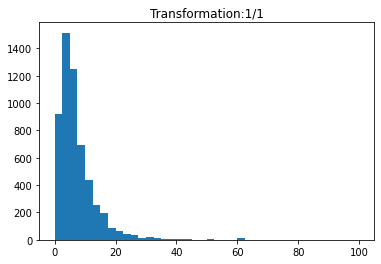

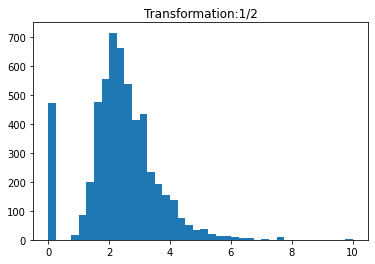

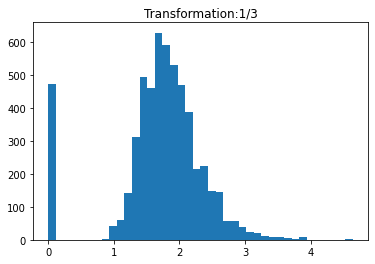

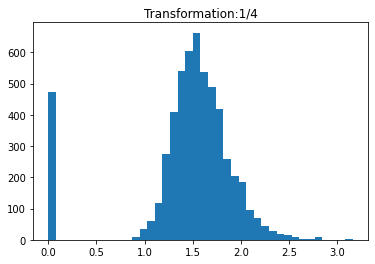

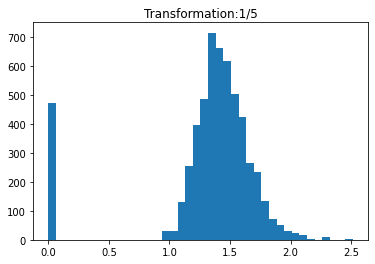

In [ ]:
for i in [1, 2, 3, 4, 5]:
  plt.hist((data['body_punc_len%'])**(1/i), bins = 40 )
  plt.title('Transformation:1/{}'.format(str(i)))
  plt.show()

more i seems better distribusion sor distribusion of 1/4 or 1/5 have the best distribusion to use.

Zero in left size means we have no punctuation, so power of zero will be kept zero (1/2 to 1/5) 

# Building Machine Learning Classifier

## Random Forest

- Ensemble learning method that constructs a collection of decision trees and then aggregates the predictions of each tree to determine the final prediction

**Benifits:**

1. Can be used for classification or regression
2. Easily handles ourliers, missing values, etc
3. Accepts varous types of inputs (continuous, ordinal, etc)
4. Less likely to overfit
5. Outputs feature importance

In [ ]:
data.head()

,label,body_text,body_len,body_punc_len%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


In [ ]:
def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords_eng]
  return text



tfidf_vec = TfidfVectorizer(analyzer=clean_text) 
x_tfidf = tfidf_vec.fit_transform(data['body_text'])


In [ ]:
x_features = pd.concat([data['body_len'], data['body_punc_len%'], pd.DataFrame(x_tfidf.toarray())], axis=1)
x_features.head()

,body_len,body_punc_len%,0,1,2,3,4,5,6,7,...,8330,8331,8332,8333,8334,8335,8336,8337,8338,8339
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- import random forest from sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

## K-fold validation

In [ ]:
rf = RandomForestClassifier(n_jobs=-1) # n_jobs=-1 let run model run in parallel

k_fold = KFold(n_splits=5) #  5 fold cross validation
cross_val_score(rf, x_features, data['label'], cv = k_fold, scoring = 'accuracy', n_jobs=-1)

array([0.97668161, 0.97847534, 0.97576302, 0.96409336, 0.97217235])

## Hold  out validation

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, data['label'], test_size=0.2)

In [ ]:
rf_holdon = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1) # n_jobs=-1 let run model run in parallel

rf_model = rf_holdon.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


- find the most important fetures

In [ ]:
sorted(zip(rf_model.feature_importances_,x_train.columns), reverse=True)[0:10]

[(0.04426642782928137, 'body_len'),
 (0.037542459666359586, 5012),
 (0.034646535057030206, 2019),
 (0.03391435314624522, 2246),
 (0.02626866362776657, 3351),
 (0.02314165087443459, 7580),
 (0.02075431543910613, 6210),
 (0.01608716889205609, 7250),
 (0.015394529362737202, 5948),
 (0.015054033311528959, 8016)]

-predicting model

In [ ]:
y_pred = rf_holdon.predict(x_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print('Precision: {}%, Recall: {}%, F-score:{}, Accuracy: {}%'. format(round(100*precision, 2),
                                                        round(100*recall, 2),
                                                        round(fscore, 2),
                                                        round(100*(y_pred==y_test).sum() / len(y_pred),2)))

Precision: 100.0%, Recall: 60.14%, F-score:0.75, Accuracy: 94.71%


- Precision 100%: all mail in the spam folder is actually spam
- Recall 55.2%: 55.2% of all spam that has come into you email was properly placed in the spam folder
- Accuracy 93.4%: 93.4% of emails that have come into your email were correctly identified as spam or ham

## Grid-search to find best Random Forest Model

In [ ]:
def train_RF(n_est, depth):
  rf_grid = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1) # n_jobs=-1 let run model run in parallel
  rf_grid_model = rf_grid.fit(x_train,y_train)
  y_pred = rf_grid_model.predict(x_test)
  precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
  print('Est: {}, Depth: {} ---- Precision: {}%, Recall: {}%, F-score:{}, Accuracy: {}%'. format(n_est,
                                                                                               depth, 
                                                                                               round(100*precision, 2),
                                                                                               round(100*recall, 2),
                                                                                               round(fscore, 2), round(100*(y_pred==y_test).sum() / len(y_pred),2)))



In [ ]:

for n_est in [10, 30, 50, 100, 200]:
  for depth in [10, 20, 30, 40, 50, None]:
    train_RF(n_est, depth)

Est: 10, Depth: 10 ---- Precision: 100.0%, Recall: 22.97%, F-score:0.37, Accuracy: 89.78%
Est: 10, Depth: 20 ---- Precision: 100.0%, Recall: 56.08%, F-score:0.72, Accuracy: 94.17%
Est: 10, Depth: 30 ---- Precision: 98.17%, Recall: 72.3%, F-score:0.83, Accuracy: 96.14%
Est: 10, Depth: 40 ---- Precision: 99.12%, Recall: 76.35%, F-score:0.86, Accuracy: 96.77%
Est: 10, Depth: 50 ---- Precision: 100.0%, Recall: 82.43%, F-score:0.9, Accuracy: 97.67%
Est: 10, Depth: None ---- Precision: 99.14%, Recall: 77.7%, F-score:0.87, Accuracy: 96.95%
Est: 30, Depth: 10 ---- Precision: 100.0%, Recall: 20.95%, F-score:0.35, Accuracy: 89.51%
Est: 30, Depth: 20 ---- Precision: 100.0%, Recall: 66.89%, F-score:0.8, Accuracy: 95.61%
Est: 30, Depth: 30 ---- Precision: 100.0%, Recall: 70.95%, F-score:0.83, Accuracy: 96.14%
Est: 30, Depth: 40 ---- Precision: 98.33%, Recall: 79.73%, F-score:0.88, Accuracy: 97.13%
Est: 30, Depth: 50 ---- Precision: 100.0%, Recall: 81.08%, F-score:0.9, Accuracy: 97.49%
Est: 30, Dept

Est: 200, Depth: None is the best model with following metrics

- Precision: 100.0%
- Recall: 85.81%
- F-score:0.92
- Accuracy: 98.12% is the

## Using Grid search from sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_features, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,31.647208,2.231466,0.391875,0.008136,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975785,0.977578,0.977558,0.968582,0.973070,0.974515,0.003393,1
11,34.298919,4.576758,0.475152,0.137653,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975785,0.976682,0.974865,0.968582,0.975763,0.974335,0.002934,2
10,18.315326,2.165308,0.306650,0.052347,None,150,"{'max_depth': None, 'n_estimators': 150}",0.975785,0.975785,0.973968,0.965889,0.974865,0.973258,0.003746,3
7,14.874949,0.389511,0.274769,0.008187,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975785,0.976682,0.973070,0.965889,0.973968,0.973079,0.003816,4
5,23.814525,0.626329,0.359147,0.015138,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.974888,0.978475,0.973070,0.963196,0.973070,0.972540,0.005072,5


# Conclusions

- Vectorizier should be fit on the training set and only be used to transform the test set
- Grid search helped to find best random forest

**NLP main pipeline:**

1. **Raw text:** model can't distinguish words
2. **Tokonize:** tell the model what to look at
3. **clean text:** remove stop words/punctuation, stemming, etc
4. **Vectorize:** convert to numeric form
5. **Feature Engineering**
6. **Machine Learning algorithm:** fit/train model

it is important to track time for prediciton especially for bussiness case


In [ ]:
import time

start = time.time()
rf_holdon = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1) # n_jobs=-1 let run model run in parallel
rf_model = rf_holdon.fit(x_train, y_train)
end = time.time()
fit_time = (end-start)


start = time.time()
y_pred = rf_holdon.predict(x_test)
end = time.time()
deploy_time = (end-start)


print('Training time: {} [ms], Deploying time: {}[ms]%'. format(round(1000*fit_time,3),
                                                        round(1000*deploy_time,3)))

Training time: 1639.351 [ms], Deploying time: 257.545[ms]%
